In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

OUTPUT_DIR = '../../output'

In [2]:
df_20_p20_i50 = pd.read_csv('../../measurements/df_20_p20_i50.csv')
df_40_p20_i50 = pd.read_csv('../../measurements/df_40_p20_i50.csv')
df_60_p20_i50 = pd.read_csv('../../measurements/df_60_p20_i50.csv')
df_80_p20_i50 = pd.read_csv('../../measurements/df_80_p20_i50.csv')

In [3]:
df_20_p20_i50['Perplexity_df_20_P_20_I_50'] = df_20_p20_i50['Log_Perplexity_df_20_P_20_I_50'].apply(lambda x: np.exp2(-x))
df_40_p20_i50['Perplexity_df_40_P_20_I_50'] = df_40_p20_i50['Log_Perplexity_df_40_P_20_I_50'].apply(lambda x: np.exp2(-x))
df_60_p20_i50['Perplexity_df_60_P_20_I_50'] = df_60_p20_i50['Log_Perplexity_df_60_P_20_I_50'].apply(lambda x: np.exp2(-x))
df_80_p20_i50['Perplexity_df_80_P_20_I_50'] = df_80_p20_i50['Log_Perplexity_df_80_P_20_I_50'].apply(lambda x: np.exp2(-x))

In [4]:
measures = df_20_p20_i50.merge(df_40_p20_i50, on="Num_Topics", left_index=True, right_index=True).merge(df_60_p20_i50, on="Num_Topics", 
                                                               left_index=True, right_index=True).merge(df_80_p20_i50, on="Num_Topics", 
                                                               left_index=True, right_index=True)
measures

,Num_Topics,Log_Perplexity_df_20_P_20_I_50,Topic_Coherence(u_mass)_df_20_P_20_I_50,Topic_Coherence(c_uci)_df_20_P_20_I_50,Topic_Coherence(c_v)_df_20_P_20_I_50,Topic_Coherence(c_npmi)_df_20_P_20_I_50,Perplexity_df_20_P_20_I_50,Log_Perplexity_df_40_P_20_I_50,Topic_Coherence(u_mass)_df_40_P_20_I_50,Topic_Coherence(c_uci)_df_40_P_20_I_50,...,Topic_Coherence(c_uci)_df_60_P_20_I_50,Topic_Coherence(c_v)_df_60_P_20_I_50,Topic_Coherence(c_npmi)_df_60_P_20_I_50,Perplexity_df_60_P_20_I_50,Log_Perplexity_df_80_P_20_I_50,Topic_Coherence(u_mass)_df_80_P_20_I_50,Topic_Coherence(c_uci)_df_80_P_20_I_50,Topic_Coherence(c_v)_df_80_P_20_I_50,Topic_Coherence(c_npmi)_df_80_P_20_I_50,Perplexity_df_80_P_20_I_50
0,10.0,-8.249201,-0.876866,-0.617612,0.376589,0.021451,304.268535,-8.383217,-1.189950,-0.255600,...,0.075485,0.397484,0.037982,336.601918,-8.384505,-0.872764,-0.400443,0.364159,0.012823,334.185527
1,20.0,-8.211795,-0.825149,-0.144573,0.422334,0.036935,296.480808,-8.352340,-1.221545,-0.278267,...,-0.106013,0.399426,0.042121,329.522782,-8.337951,-0.896940,-0.278112,0.380825,0.030835,323.573704
2,30.0,-8.196360,-1.885266,-0.726829,0.422881,0.032111,293.325805,-8.355470,-1.467882,-0.473125,...,-0.311051,0.373027,0.029498,323.678051,-8.336697,-1.183224,-0.277128,0.374281,0.025737,323.292678
3,40.0,-8.197409,-1.156233,-0.587043,0.453131,0.036958,293.539051,-8.340605,-1.131107,-0.146412,...,-0.609837,0.366225,0.014811,322.745339,-8.327271,-0.997116,-0.127196,0.380077,0.037049,321.187398
4,50.0,-8.200556,-1.334313,-0.573829,0.449033,0.031054,294.180098,-8.343621,-1.348153,-0.521475,...,-0.385896,0.385399,0.026612,323.145555,-8.322270,-1.680580,-0.417814,0.397984,0.028163,320.075874
5,60.0,-8.203902,-1.380076,-1.000666,0.421980,0.002968,294.863156,-8.327580,-1.433466,-0.320408,...,-0.101180,0.406421,0.044315,321.673310,-8.318251,-1.485579,-0.544525,0.373064,0.018088,319.185408
6,70.0,-8.225967,-1.425433,-0.955917,0.423831,0.003637,299.407605,-8.347196,-1.605261,-0.448102,...,-0.720783,0.396531,0.017559,323.198696,-8.304850,-1.451876,-0.067233,0.421788,0.042403,316.234314
7,80.0,-8.215782,-1.424041,-0.935428,0.413211,-0.002954,297.301324,-8.359745,-1.905216,-0.906759,...,-0.519191,0.415573,0.024743,323.460997,-8.312751,-1.916520,-0.259841,0.428091,0.042279,317.970863
8,90.0,-8.218074,-1.389917,-0.763792,0.461171,0.014256,297.773963,-8.356807,-1.832419,-0.383262,...,-0.716661,0.383521,0.012531,325.015753,-8.312191,-1.628939,-0.367730,0.403198,0.029618,317.847418
9,100.0,-8.221335,-1.093263,-0.871591,0.419029,0.000052,298.447841,-8.360858,-1.533677,-0.782382,...,-0.480924,0.417205,0.024386,324.237698,-8.314942,-1.838340,-0.362698,0.420312,0.030732,318.454106


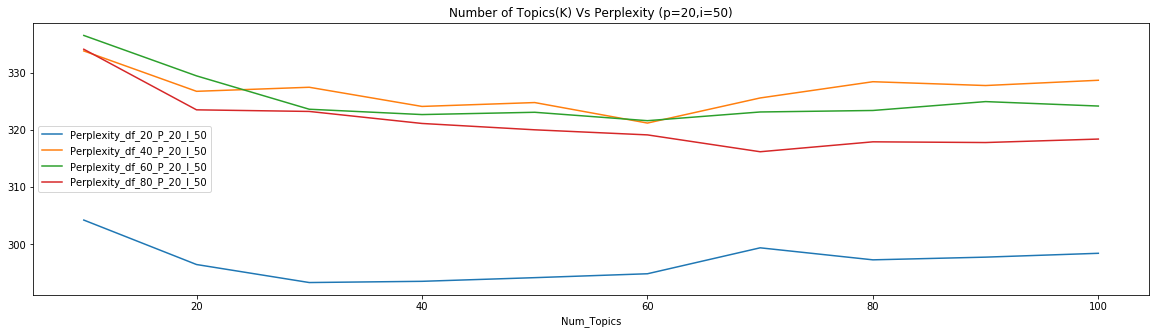

In [5]:
df = measures
figsize = (20,5)

df.plot(x='Num_Topics', y=['Perplexity_df_20_P_20_I_50', 'Perplexity_df_40_P_20_I_50',
                           'Perplexity_df_60_P_20_I_50', 'Perplexity_df_80_P_20_I_50'],
        figsize=figsize, title='Number of Topics(K) Vs Perplexity (p=20,i=50)')
#plt.savefig(OUTPUT_DIR+"/perplexity_graphs_20_i50.png")

In [6]:
measures['Topic_Coherence(u_mass)_df_80_P_20_I_50']

0   -0.872764
1   -0.896940
2   -1.183224
3   -0.997116
4   -1.680580
5   -1.485579
6   -1.451876
7   -1.916520
8   -1.628939
9   -1.838340
Name: Topic_Coherence(u_mass)_df_80_P_20_I_50, dtype: float64

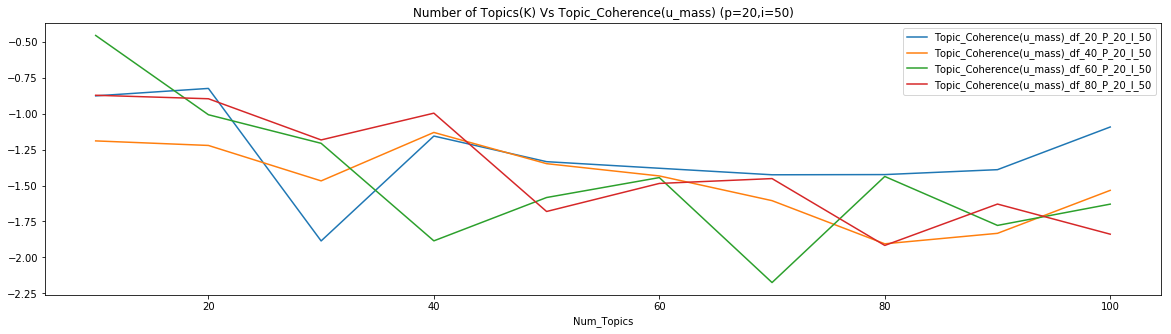

In [7]:
figsize = (20,5)

df.plot(x='Num_Topics', y=['Topic_Coherence(u_mass)_df_20_P_20_I_50', 'Topic_Coherence(u_mass)_df_40_P_20_I_50',
                           'Topic_Coherence(u_mass)_df_60_P_20_I_50', 'Topic_Coherence(u_mass)_df_80_P_20_I_50'],
        figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(u_mass) (p=20,i=50)')
#plt.savefig(OUTPUT_DIR+"/Topic_Coherence(u_mass)_graphs_20_i50.png")

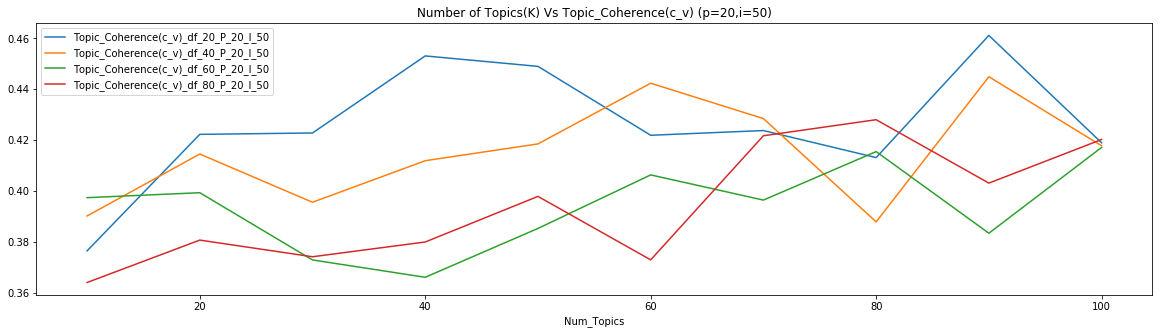

In [8]:
figsize = (20,5)

df.plot(x='Num_Topics', y=['Topic_Coherence(c_v)_df_20_P_20_I_50', 'Topic_Coherence(c_v)_df_40_P_20_I_50',
                           'Topic_Coherence(c_v)_df_60_P_20_I_50', 'Topic_Coherence(c_v)_df_80_P_20_I_50'],
        figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_v) (p=20,i=50)')
#plt.savefig(OUTPUT_DIR+"/Topic_Coherence(c_v)_graphs_20_i50.png")

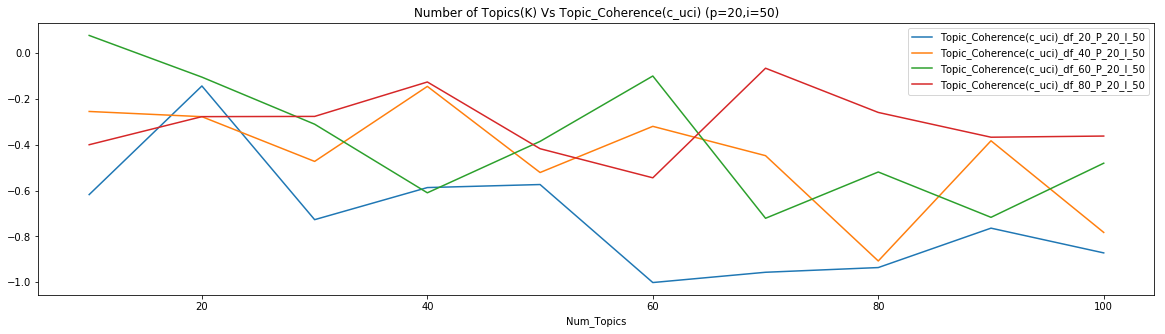

In [9]:
figsize = (20,5)

df.plot(x='Num_Topics', y=['Topic_Coherence(c_uci)_df_20_P_20_I_50', 'Topic_Coherence(c_uci)_df_40_P_20_I_50',
                           'Topic_Coherence(c_uci)_df_60_P_20_I_50', 'Topic_Coherence(c_uci)_df_80_P_20_I_50'],
        figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_uci) (p=20,i=50)')
#plt.savefig(OUTPUT_DIR+"/Topic_Coherence(c_uci)_graphs_20_i50.png")

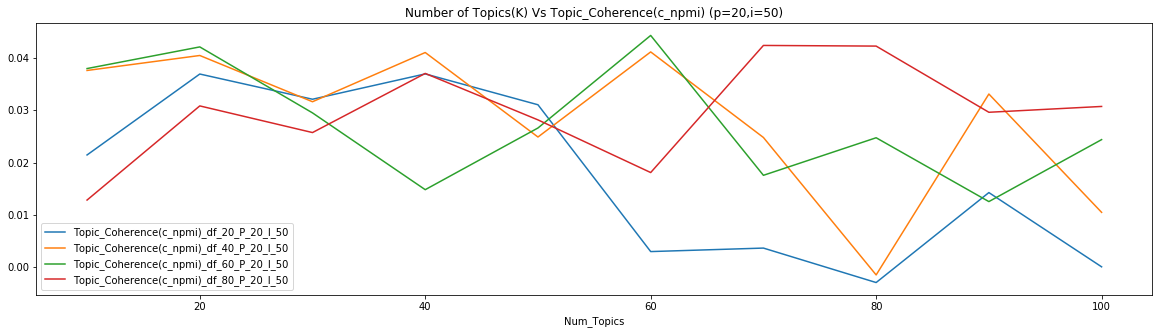

In [10]:
figsize = (20,5)

df.plot(x='Num_Topics', y=['Topic_Coherence(c_npmi)_df_20_P_20_I_50', 'Topic_Coherence(c_npmi)_df_40_P_20_I_50',
                           'Topic_Coherence(c_npmi)_df_60_P_20_I_50', 'Topic_Coherence(c_npmi)_df_80_P_20_I_50'],
        figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_npmi) (p=20,i=50)')
#plt.savefig(OUTPUT_DIR+"/Topic_Coherence(c_npmi)_graphs_20_i50.png")

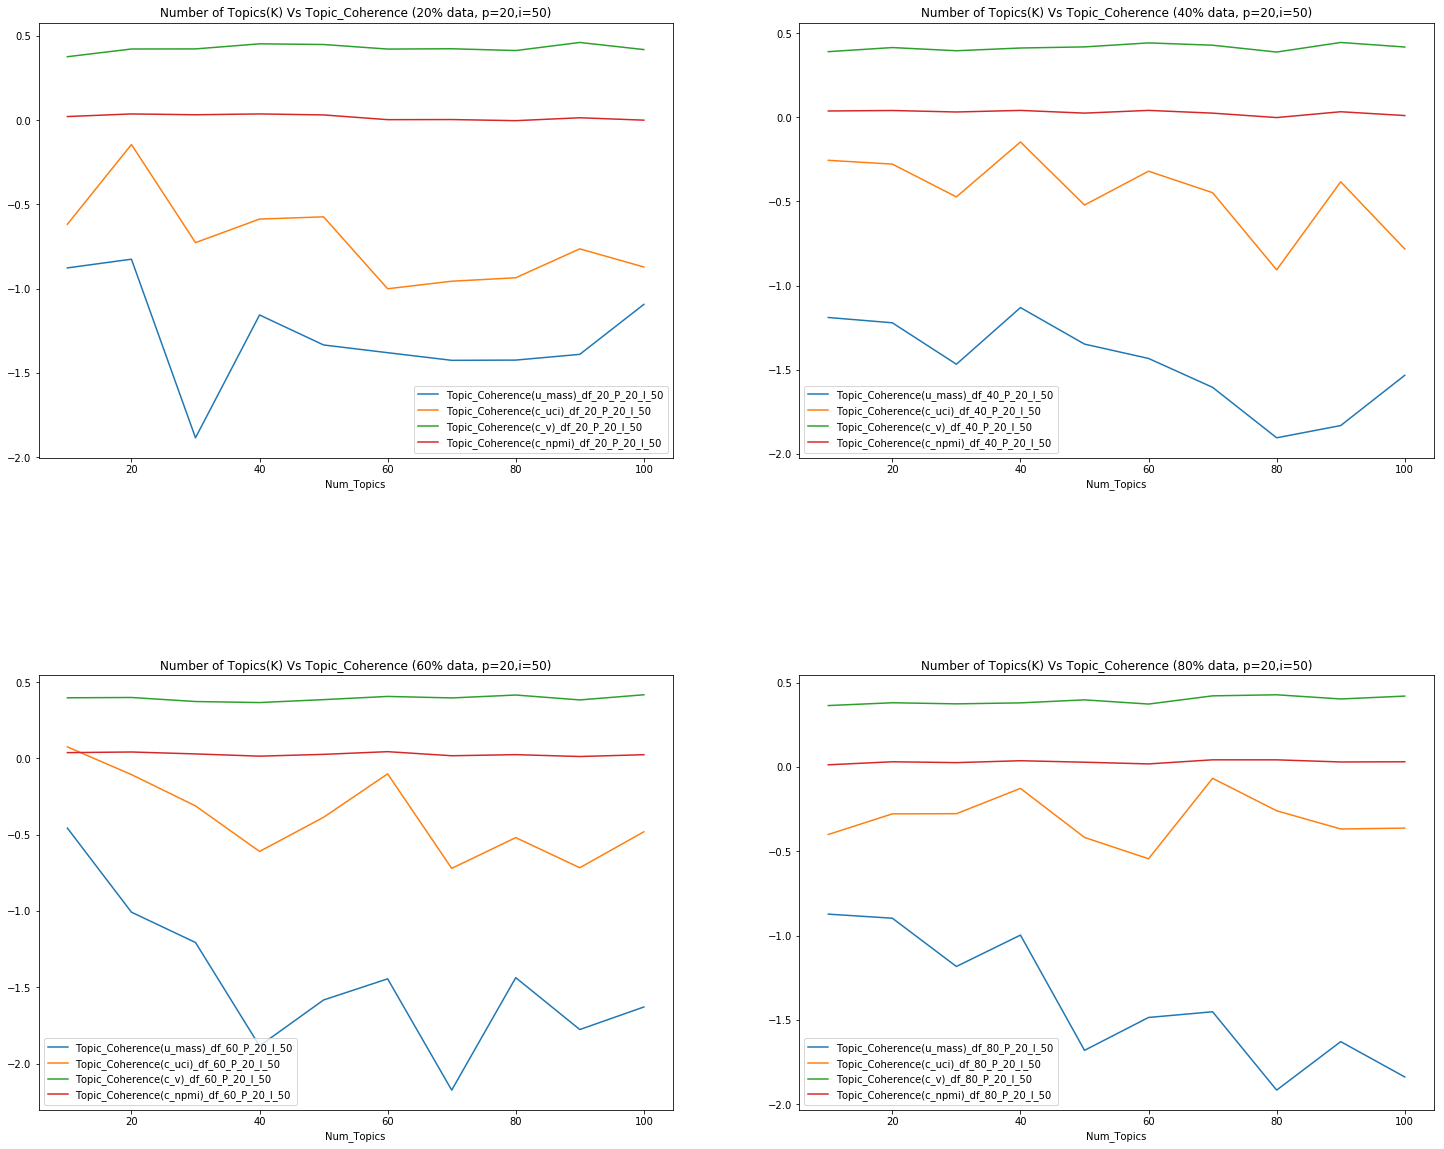

In [11]:
figsize = (25,20)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=.5)

ax1 = df.plot(ax=axes[0][0], x='Num_Topics', y=['Topic_Coherence(u_mass)_df_20_P_20_I_50', 'Topic_Coherence(c_uci)_df_20_P_20_I_50',
                                                'Topic_Coherence(c_v)_df_20_P_20_I_50', 'Topic_Coherence(c_npmi)_df_20_P_20_I_50',],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence (20% data, p=20,i=50)')

ax2 = df.plot(ax=axes[0][1], x='Num_Topics', y=['Topic_Coherence(u_mass)_df_40_P_20_I_50', 'Topic_Coherence(c_uci)_df_40_P_20_I_50',
                                                'Topic_Coherence(c_v)_df_40_P_20_I_50', 'Topic_Coherence(c_npmi)_df_40_P_20_I_50',],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence (40% data, p=20,i=50)')

ax3 = df.plot(ax=axes[1][0], x='Num_Topics', y=['Topic_Coherence(u_mass)_df_60_P_20_I_50', 'Topic_Coherence(c_uci)_df_60_P_20_I_50',
                                                'Topic_Coherence(c_v)_df_60_P_20_I_50', 'Topic_Coherence(c_npmi)_df_60_P_20_I_50',],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence (60% data, p=20,i=50)')

ax4 = df.plot(ax=axes[1][1], x='Num_Topics', y=['Topic_Coherence(u_mass)_df_80_P_20_I_50', 'Topic_Coherence(c_uci)_df_80_P_20_I_50',
                                                'Topic_Coherence(c_v)_df_80_P_20_I_50', 'Topic_Coherence(c_npmi)_df_80_P_20_I_50',],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence (80% data, p=20,i=50)')

# ax2 = df.plot(ax=axes[0][1], x='Num_Topics', y=['Topic_Coherence(c_v)_df_20_P_20_I_50', 
#                                                 'Topic_Coherence(c_v)_df_60_P_20_I_50', 'Topic_Coherence(c_v)_df_80_P_20_I_50'],
#                                  figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_v) (p=20,i=50)')
# ax3 = df.plot(ax=axes[1][0], x='Num_Topics', y=['Topic_Coherence(c_uci)_df_20_P_20_I_50', 
#                                                 'Topic_Coherence(c_uci)_df_60_P_20_I_50', 'Topic_Coherence(c_uci)_df_80_P_20_I_50'],
#                                  figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_uci) (p=20,i=50)')
# ax4 = df.plot(ax=axes[1][1], x='Num_Topics', y=['Topic_Coherence(c_npmi)_df_20_P_20_I_50', 
#                                                 'Topic_Coherence(c_npmi)_df_60_P_20_I_50', 'Topic_Coherence(c_npmi)_df_80_P_20_I_50'],
#                                  figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_npmi) (p=20,i=50)')
#plt.savefig(OUTPUT_DIR+"/Topic_Coherence_graphs_20_i50.png")

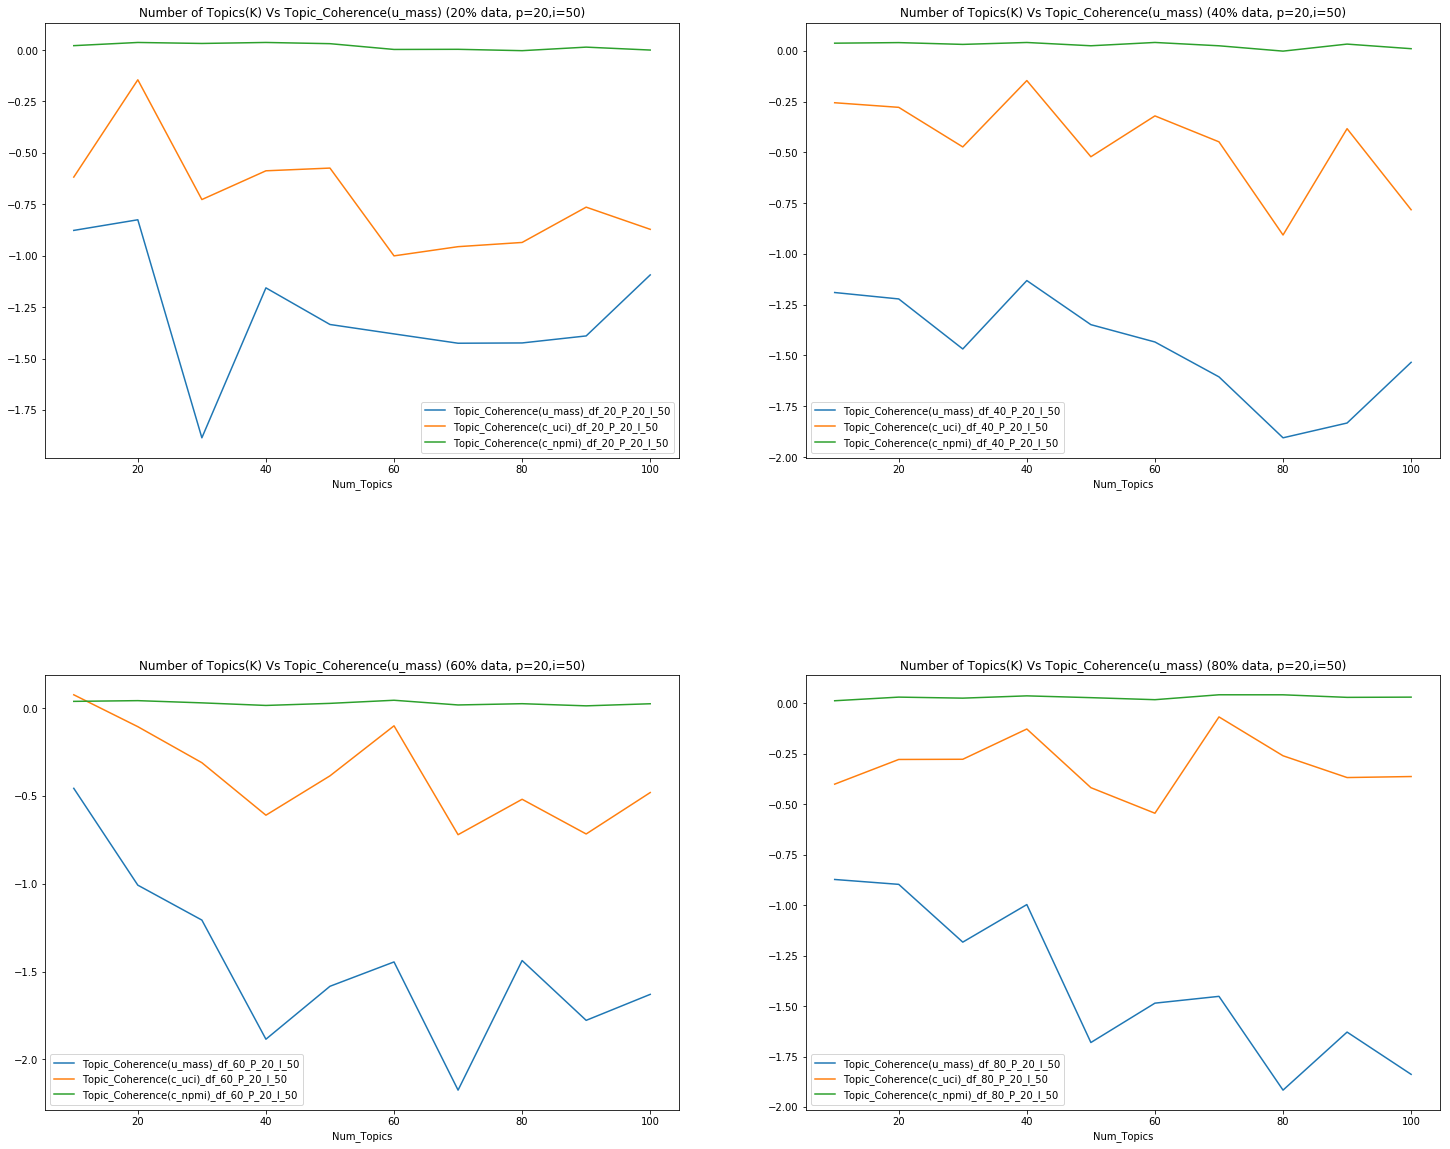

In [12]:
figsize = (25,20)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=.5)

ax1 = df.plot(ax=axes[0][0], x='Num_Topics', y=['Topic_Coherence(u_mass)_df_20_P_20_I_50', 'Topic_Coherence(c_uci)_df_20_P_20_I_50',
                                                'Topic_Coherence(c_npmi)_df_20_P_20_I_50',],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(u_mass) (20% data, p=20,i=50)')

ax2 = df.plot(ax=axes[0][1], x='Num_Topics', y=['Topic_Coherence(u_mass)_df_40_P_20_I_50', 'Topic_Coherence(c_uci)_df_40_P_20_I_50',
                                                'Topic_Coherence(c_npmi)_df_40_P_20_I_50',],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(u_mass) (40% data, p=20,i=50)')

ax3 = df.plot(ax=axes[1][0], x='Num_Topics', y=['Topic_Coherence(u_mass)_df_60_P_20_I_50', 'Topic_Coherence(c_uci)_df_60_P_20_I_50',
                                                'Topic_Coherence(c_npmi)_df_60_P_20_I_50',],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(u_mass) (60% data, p=20,i=50)')

ax4 = df.plot(ax=axes[1][1], x='Num_Topics', y=['Topic_Coherence(u_mass)_df_80_P_20_I_50', 'Topic_Coherence(c_uci)_df_80_P_20_I_50',
                                                'Topic_Coherence(c_npmi)_df_80_P_20_I_50',],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(u_mass) (80% data, p=20,i=50)')

# ax2 = df.plot(ax=axes[0][1], x='Num_Topics', y=['Topic_Coherence(c_v)_df_20_P_20_I_50', 
#                                                 'Topic_Coherence(c_v)_df_60_P_20_I_50', 'Topic_Coherence(c_v)_df_80_P_20_I_50'],
#                                  figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_v) (p=20,i=50)')
# ax3 = df.plot(ax=axes[1][0], x='Num_Topics', y=['Topic_Coherence(c_uci)_df_20_P_20_I_50', 
#                                                 'Topic_Coherence(c_uci)_df_60_P_20_I_50', 'Topic_Coherence(c_uci)_df_80_P_20_I_50'],
#                                  figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_uci) (p=20,i=50)')
# ax4 = df.plot(ax=axes[1][1], x='Num_Topics', y=['Topic_Coherence(c_npmi)_df_20_P_20_I_50', 
#                                                 'Topic_Coherence(c_npmi)_df_60_P_20_I_50', 'Topic_Coherence(c_npmi)_df_80_P_20_I_50'],
#                                  figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_npmi) (p=20,i=50)')
#plt.savefig(OUTPUT_DIR+"/Topic_Coherence_graphs_20_i50_1.png")

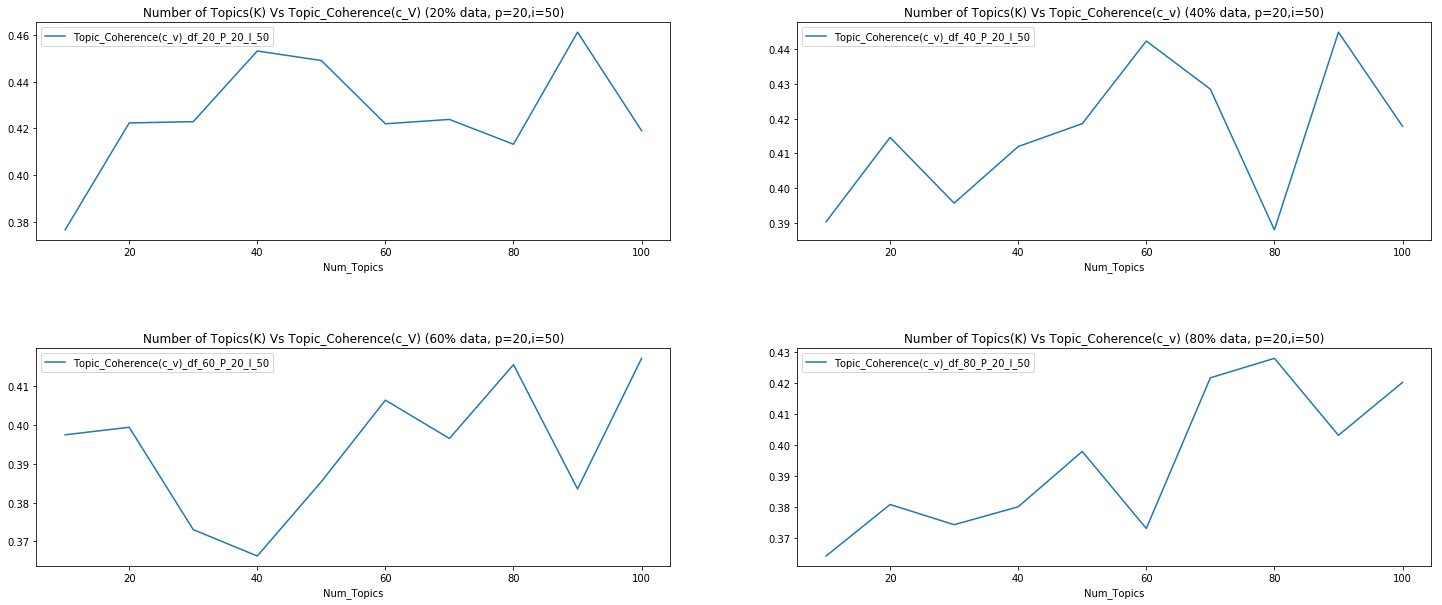

In [13]:
figsize = (25,10)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=.5)

ax1 = df.plot(ax=axes[0][0], x='Num_Topics', y=['Topic_Coherence(c_v)_df_20_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_V) (20% data, p=20,i=50)')

ax2 = df.plot(ax=axes[0][1], x='Num_Topics', y=['Topic_Coherence(c_v)_df_40_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_v) (40% data, p=20,i=50)')

ax3 = df.plot(ax=axes[1][0], x='Num_Topics', y=['Topic_Coherence(c_v)_df_60_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_V) (60% data, p=20,i=50)')

ax4 = df.plot(ax=axes[1][1], x='Num_Topics', y=['Topic_Coherence(c_v)_df_80_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_v) (80% data, p=20,i=50)')


#plt.savefig(OUTPUT_DIR+"/Topic_Coherence_graphs_20_i50_2.png")

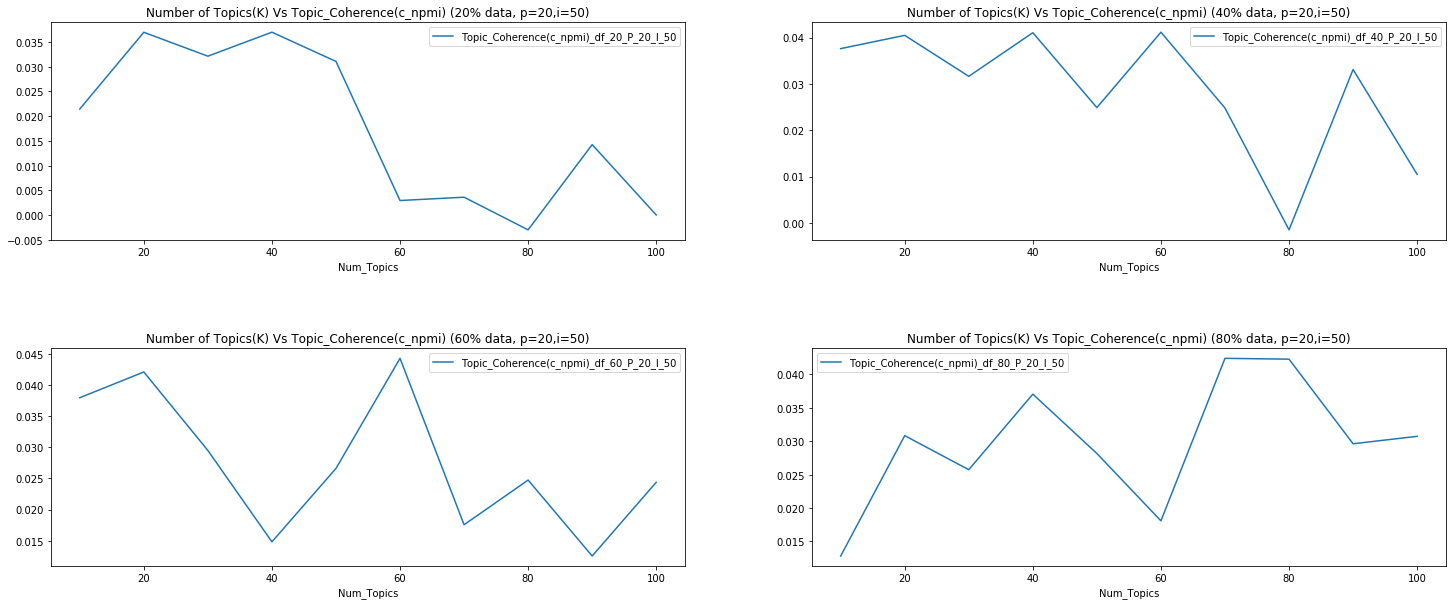

In [14]:
figsize = (25,10)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=.5)

ax1 = df.plot(ax=axes[0][0], x='Num_Topics', y=['Topic_Coherence(c_npmi)_df_20_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_npmi) (20% data, p=20,i=50)')

ax2 = df.plot(ax=axes[0][1], x='Num_Topics', y=['Topic_Coherence(c_npmi)_df_40_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_npmi) (40% data, p=20,i=50)')

ax3 = df.plot(ax=axes[1][0], x='Num_Topics', y=['Topic_Coherence(c_npmi)_df_60_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_npmi) (60% data, p=20,i=50)')

ax4 = df.plot(ax=axes[1][1], x='Num_Topics', y=['Topic_Coherence(c_npmi)_df_80_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Topic_Coherence(c_npmi) (80% data, p=20,i=50)')


#plt.savefig(OUTPUT_DIR+"/Topic_Coherence_graphs_20_i50_3.png")


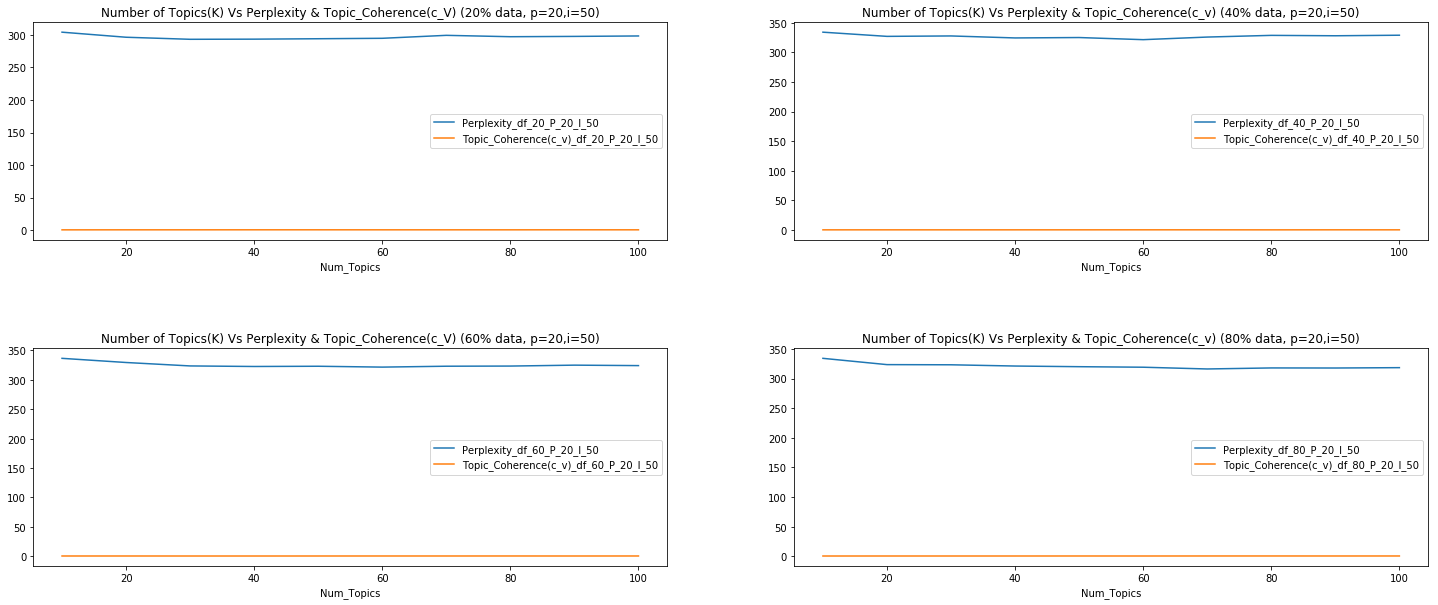

In [15]:
figsize = (25,10)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=.5)

ax1 = df.plot(ax=axes[0][0], x='Num_Topics', y=['Perplexity_df_20_P_20_I_50', 'Topic_Coherence(c_v)_df_20_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Perplexity & Topic_Coherence(c_V) (20% data, p=20,i=50)')

ax2 = df.plot(ax=axes[0][1], x='Num_Topics', y=['Perplexity_df_40_P_20_I_50', 'Topic_Coherence(c_v)_df_40_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Perplexity & Topic_Coherence(c_v) (40% data, p=20,i=50)')

ax3 = df.plot(ax=axes[1][0], x='Num_Topics', y=['Perplexity_df_60_P_20_I_50', 'Topic_Coherence(c_v)_df_60_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Perplexity & Topic_Coherence(c_V) (60% data, p=20,i=50)')

ax4 = df.plot(ax=axes[1][1], x='Num_Topics', y=['Perplexity_df_80_P_20_I_50', 'Topic_Coherence(c_v)_df_80_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Perplexity & Topic_Coherence(c_v) (80% data, p=20,i=50)')


#plt.savefig(OUTPUT_DIR+"/Topic_Coherence_graphs_20_i50_4.png")

In [16]:

x = pd.DataFrame(measures['Topic_Coherence(c_v)_df_20_P_20_I_50']).values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized1 = pd.DataFrame(x_scaled)

df_normalized1.rename(columns={0:'N_Topic_Coherence(c_v)_df_20_P_20_I_50'}, inplace=True)
df_normalized1

x = pd.DataFrame(measures['Topic_Coherence(c_v)_df_40_P_20_I_50']).values.astype(float)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized2 = pd.DataFrame(x_scaled)

df_normalized2.rename(columns={0:'N_Topic_Coherence(c_v)_df_40_P_20_I_50'}, inplace=True)
df_normalized2

x = pd.DataFrame(measures['Topic_Coherence(c_v)_df_60_P_20_I_50']).values.astype(float)


# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized3 = pd.DataFrame(x_scaled)

df_normalized3.rename(columns={0:'N_Topic_Coherence(c_v)_df_60_P_20_I_50'}, inplace=True)
df_normalized3

x = pd.DataFrame(measures['Topic_Coherence(c_v)_df_80_P_20_I_50']).values.astype(float)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized4 = pd.DataFrame(x_scaled)

df_normalized4.rename(columns={0:'N_Topic_Coherence(c_v)_df_80_P_20_I_50'}, inplace=True)
df_normalized4

df_norm2 = df_normalized1.merge(df_normalized2, left_index=True, right_index=True).merge(df_normalized3,
                                                               left_index=True, right_index=True).merge(df_normalized4,  
                                                               left_index=True, right_index=True)
df_norm2['Num_Topics'] = measures['Num_Topics']
df_norm2

,N_Topic_Coherence(c_v)_df_20_P_20_I_50,N_Topic_Coherence(c_v)_df_40_P_20_I_50,N_Topic_Coherence(c_v)_df_60_P_20_I_50,N_Topic_Coherence(c_v)_df_80_P_20_I_50,Num_Topics
0,0.000000,0.040532,0.613158,0.000000,10.0
1,0.540838,0.467542,0.651258,0.260676,20.0
2,0.547302,0.135182,0.133416,0.158321,30.0
3,0.904941,0.421520,0.000000,0.248981,40.0
4,0.856488,0.537125,0.376106,0.529073,50.0
5,0.536650,0.955338,0.788467,0.139288,60.0
6,0.558530,0.711787,0.594459,0.901411,70.0
7,0.432976,0.000000,0.967996,1.000000,80.0
8,1.000000,1.000000,0.339267,0.610627,90.0
9,0.501767,0.524344,1.000000,0.878318,100.0


In [17]:
measures['N_Topic_Coherence(c_v)_df_20_P_20_I_50'] = df_norm2['N_Topic_Coherence(c_v)_df_20_P_20_I_50']
measures['N_Topic_Coherence(c_v)_df_40_P_20_I_50'] = df_norm2['N_Topic_Coherence(c_v)_df_40_P_20_I_50']
measures['N_Topic_Coherence(c_v)_df_60_P_20_I_50'] = df_norm2['N_Topic_Coherence(c_v)_df_60_P_20_I_50']
measures['N_Topic_Coherence(c_v)_df_80_P_20_I_50'] = df_norm2['N_Topic_Coherence(c_v)_df_80_P_20_I_50']

measures.columns

Index([u'Num_Topics', u'Log_Perplexity_df_20_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_20_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_20_P_20_I_50',
       u'Topic_Coherence(c_v)_df_20_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_20_P_20_I_50',
       u'Perplexity_df_20_P_20_I_50', u'Log_Perplexity_df_40_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_40_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_40_P_20_I_50',
       u'Topic_Coherence(c_v)_df_40_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_40_P_20_I_50',
       u'Perplexity_df_40_P_20_I_50', u'Log_Perplexity_df_60_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_60_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_60_P_20_I_50',
       u'Topic_Coherence(c_v)_df_60_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_60_P_20_I_50',
       u'Perplexity_df_60_P_20_I_50', u'Log_Perplexity_df_80_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_80_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_80_P_20_I_50',
       u'Topic_Coherenc

In [18]:

x = pd.DataFrame(measures['Topic_Coherence(c_v)_df_20_P_20_I_50']).values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = StandardScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized1 = pd.DataFrame(x_scaled)

df_normalized1.rename(columns={0:'Standard_N_Topic_Coherence(c_v)_df_20_P_20_I_50'}, inplace=True)
df_normalized1

x = pd.DataFrame(measures['Topic_Coherence(c_v)_df_40_P_20_I_50']).values.astype(float)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized2 = pd.DataFrame(x_scaled)

df_normalized2.rename(columns={0:'Standard_N_Topic_Coherence(c_v)_df_40_P_20_I_50'}, inplace=True)
df_normalized2

x = pd.DataFrame(measures['Topic_Coherence(c_v)_df_60_P_20_I_50']).values.astype(float)


# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized3 = pd.DataFrame(x_scaled)

df_normalized3.rename(columns={0:'Standard_N_Topic_Coherence(c_v)_df_60_P_20_I_50'}, inplace=True)
df_normalized3

x = pd.DataFrame(measures['Topic_Coherence(c_v)_df_80_P_20_I_50']).values.astype(float)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized4 = pd.DataFrame(x_scaled)

df_normalized4.rename(columns={0:'Standard_N_Topic_Coherence(c_v)_df_80_P_20_I_50'}, inplace=True)
df_normalized4

df_norm3 = df_normalized1.merge(df_normalized2, left_index=True, right_index=True).merge(df_normalized3,
                                                               left_index=True, right_index=True).merge(df_normalized4,  
                                                               left_index=True, right_index=True)
df_norm3['Num_Topics'] = measures['Num_Topics']
df_norm3

,Standard_N_Topic_Coherence(c_v)_df_20_P_20_I_50,Standard_N_Topic_Coherence(c_v)_df_40_P_20_I_50,Standard_N_Topic_Coherence(c_v)_df_60_P_20_I_50,Standard_N_Topic_Coherence(c_v)_df_80_P_20_I_50,Num_Topics
0,-2.180763,-1.322264,0.210975,-1.377739,10.0
1,-0.174741,-0.035541,0.331406,-0.617920,20.0
2,-0.150764,-1.037052,-1.305445,-0.916265,30.0
3,1.175756,-0.174222,-1.727160,-0.652007,40.0
4,0.996037,0.174135,-0.538324,0.164405,50.0
5,-0.190273,1.434347,0.765113,-0.971741,60.0
6,-0.109118,0.700449,0.151871,1.249697,70.0
7,-0.574812,-1.444400,1.332585,1.537065,80.0
8,1.528338,1.568929,-0.654769,0.402119,90.0
9,-0.319659,0.135620,1.433748,1.182385,100.0


In [20]:
measures['Standard_N_Topic_Coherence(c_v)_df_20_P_20_I_50'] = df_norm3['Standard_N_Topic_Coherence(c_v)_df_20_P_20_I_50']
measures['Standard_N_Topic_Coherence(c_v)_df_40_P_20_I_50'] = df_norm3['Standard_N_Topic_Coherence(c_v)_df_40_P_20_I_50']
measures['Standard_N_Topic_Coherence(c_v)_df_60_P_20_I_50'] = df_norm3['Standard_N_Topic_Coherence(c_v)_df_60_P_20_I_50']
measures['Standard_N_Topic_Coherence(c_v)_df_80_P_20_I_50'] = df_norm3['Standard_N_Topic_Coherence(c_v)_df_80_P_20_I_50']

measures.columns

Index([u'Num_Topics', u'Log_Perplexity_df_20_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_20_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_20_P_20_I_50',
       u'Topic_Coherence(c_v)_df_20_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_20_P_20_I_50',
       u'Perplexity_df_20_P_20_I_50', u'Log_Perplexity_df_40_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_40_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_40_P_20_I_50',
       u'Topic_Coherence(c_v)_df_40_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_40_P_20_I_50',
       u'Perplexity_df_40_P_20_I_50', u'Log_Perplexity_df_60_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_60_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_60_P_20_I_50',
       u'Topic_Coherence(c_v)_df_60_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_60_P_20_I_50',
       u'Perplexity_df_60_P_20_I_50', u'Log_Perplexity_df_80_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_80_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_80_P_20_I_50',
       u'Topic_Coherenc

In [21]:
x = pd.DataFrame(measures['Perplexity_df_20_P_20_I_50']).values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized1 = pd.DataFrame(x_scaled)

df_normalized1.rename(columns={0:'N_Perplexity_df_20_P_20_I_50'}, inplace=True)
df_normalized1

x = pd.DataFrame(measures['Perplexity_df_40_P_20_I_50']).values.astype(float)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized2 = pd.DataFrame(x_scaled)

df_normalized2.rename(columns={0:'N_Perplexity_df_40_P_20_I_50'}, inplace=True)
df_normalized2

x = pd.DataFrame(measures['Perplexity_df_60_P_20_I_50']).values.astype(float)


# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized3 = pd.DataFrame(x_scaled)

df_normalized3.rename(columns={0:'N_Perplexity_df_60_P_20_I_50'}, inplace=True)
df_normalized3

x = pd.DataFrame(measures['Perplexity_df_80_P_20_I_50']).values.astype(float)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized4 = pd.DataFrame(x_scaled)

df_normalized4.rename(columns={0:'N_Perplexity_df_80_P_20_I_50'}, inplace=True)
df_normalized4

df_norm = df_normalized1.merge(df_normalized2, left_index=True, right_index=True).merge(df_normalized3,
                                                               left_index=True, right_index=True).merge(df_normalized4,  
                                                               left_index=True, right_index=True)
df_norm['Num_Topics'] = measures['Num_Topics']
df_norm

,N_Perplexity_df_20_P_20_I_50,N_Perplexity_df_40_P_20_I_50,N_Perplexity_df_60_P_20_I_50,N_Perplexity_df_80_P_20_I_50,Num_Topics
0,1.000000,1.000000,1.000000,1.000000,10.0
1,0.288320,0.440261,0.525801,0.408852,20.0
2,0.000000,0.496461,0.134289,0.393197,30.0
3,0.019487,0.230659,0.071810,0.275919,40.0
4,0.078070,0.284372,0.098619,0.214000,50.0
5,0.140491,0.000000,0.000000,0.164395,60.0
6,0.555784,0.348176,0.102179,0.000000,70.0
7,0.363302,0.573407,0.119749,0.096737,80.0
8,0.406494,0.520499,0.223895,0.089860,90.0
9,0.468077,0.593476,0.171777,0.123657,100.0


In [22]:
measures['N_Perplexity_df_20_P_20_I_50'] = df_norm['N_Perplexity_df_20_P_20_I_50']
measures['N_Perplexity_df_40_P_20_I_50'] = df_norm['N_Perplexity_df_40_P_20_I_50']
measures['N_Perplexity_df_60_P_20_I_50'] = df_norm['N_Perplexity_df_60_P_20_I_50']
measures['N_Perplexity_df_80_P_20_I_50'] = df_norm['N_Perplexity_df_80_P_20_I_50']

measures.columns

Index([u'Num_Topics', u'Log_Perplexity_df_20_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_20_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_20_P_20_I_50',
       u'Topic_Coherence(c_v)_df_20_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_20_P_20_I_50',
       u'Perplexity_df_20_P_20_I_50', u'Log_Perplexity_df_40_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_40_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_40_P_20_I_50',
       u'Topic_Coherence(c_v)_df_40_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_40_P_20_I_50',
       u'Perplexity_df_40_P_20_I_50', u'Log_Perplexity_df_60_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_60_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_60_P_20_I_50',
       u'Topic_Coherence(c_v)_df_60_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_60_P_20_I_50',
       u'Perplexity_df_60_P_20_I_50', u'Log_Perplexity_df_80_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_80_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_80_P_20_I_50',
       u'Topic_Coherenc

In [23]:
x = pd.DataFrame(measures['Perplexity_df_20_P_20_I_50']).values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = StandardScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized1 = pd.DataFrame(x_scaled)

df_normalized1.rename(columns={0:'Standard_N_Perplexity_df_20_P_20_I_50'}, inplace=True)
df_normalized1

x = pd.DataFrame(measures['Perplexity_df_40_P_20_I_50']).values.astype(float)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized2 = pd.DataFrame(x_scaled)

df_normalized2.rename(columns={0:'Standard_N_Perplexity_df_40_P_20_I_50'}, inplace=True)
df_normalized2

x = pd.DataFrame(measures['Perplexity_df_60_P_20_I_50']).values.astype(float)


# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized3 = pd.DataFrame(x_scaled)

df_normalized3.rename(columns={0:'Standard_N_Perplexity_df_60_P_20_I_50'}, inplace=True)
df_normalized3

x = pd.DataFrame(measures['Perplexity_df_80_P_20_I_50']).values.astype(float)

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized4 = pd.DataFrame(x_scaled)

df_normalized4.rename(columns={0:'Standard_N_Perplexity_df_80_P_20_I_50'}, inplace=True)
df_normalized4

df_norm4 = df_normalized1.merge(df_normalized2, left_index=True, right_index=True).merge(df_normalized3,
                                                               left_index=True, right_index=True).merge(df_normalized4,  
                                                               left_index=True, right_index=True)
df_norm4['Num_Topics'] = measures['Num_Topics']
df_norm4

,Standard_N_Perplexity_df_20_P_20_I_50,Standard_N_Perplexity_df_40_P_20_I_50,Standard_N_Perplexity_df_60_P_20_I_50,Standard_N_Perplexity_df_80_P_20_I_50,Num_Topics
0,2.315444,2.189483,2.646168,2.662602,10.0
1,-0.151416,-0.033640,0.984581,0.486591,20.0
2,-1.150803,0.189571,-0.387272,0.428965,30.0
3,-1.083254,-0.866120,-0.606195,-0.002734,40.0
4,-0.880194,-0.652790,-0.512258,-0.230657,50.0
5,-0.663827,-1.782232,-0.857817,-0.413252,60.0
6,0.775684,-0.399378,-0.499784,-1.018390,70.0
7,0.108493,0.495177,-0.438218,-0.662301,80.0
8,0.258207,0.285042,-0.073292,-0.687614,90.0
9,0.471667,0.574887,-0.255914,-0.563210,100.0


In [24]:
measures['Standard_N_Perplexity_df_20_P_20_I_50'] = df_norm4['Standard_N_Perplexity_df_20_P_20_I_50']
measures['Standard_N_Perplexity_df_40_P_20_I_50'] = df_norm4['Standard_N_Perplexity_df_40_P_20_I_50']
measures['Standard_N_Perplexity_df_60_P_20_I_50'] = df_norm4['Standard_N_Perplexity_df_60_P_20_I_50']
measures['Standard_N_Perplexity_df_80_P_20_I_50'] = df_norm4['Standard_N_Perplexity_df_80_P_20_I_50']

measures.columns

Index([u'Num_Topics', u'Log_Perplexity_df_20_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_20_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_20_P_20_I_50',
       u'Topic_Coherence(c_v)_df_20_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_20_P_20_I_50',
       u'Perplexity_df_20_P_20_I_50', u'Log_Perplexity_df_40_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_40_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_40_P_20_I_50',
       u'Topic_Coherence(c_v)_df_40_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_40_P_20_I_50',
       u'Perplexity_df_40_P_20_I_50', u'Log_Perplexity_df_60_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_60_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_60_P_20_I_50',
       u'Topic_Coherence(c_v)_df_60_P_20_I_50',
       u'Topic_Coherence(c_npmi)_df_60_P_20_I_50',
       u'Perplexity_df_60_P_20_I_50', u'Log_Perplexity_df_80_P_20_I_50',
       u'Topic_Coherence(u_mass)_df_80_P_20_I_50',
       u'Topic_Coherence(c_uci)_df_80_P_20_I_50',
       u'Topic_Coherenc

In [46]:
measures['Topic_Coherence(c_v)_df_20_P_20_I_50']

0    0.376589
1    0.422334
2    0.422881
3    0.453131
4    0.449033
5    0.421980
6    0.423831
7    0.413211
8    0.461171
9    0.419029
Name: Topic_Coherence(c_v)_df_20_P_20_I_50, dtype: float64

In [55]:
measures['Norm_Perplexity_df_20_P_20_I_50']= measures['Perplexity_df_20_P_20_I_50'].apply(lambda x: x/1000)
measures['Norm_Perplexity_df_40_P_20_I_50']= measures['Perplexity_df_40_P_20_I_50'].apply(lambda x: x/1000)
measures['Norm_Perplexity_df_60_P_20_I_50']= measures['Perplexity_df_60_P_20_I_50'].apply(lambda x: x/1000)
measures['Norm_Perplexity_df_80_P_20_I_50']= measures['Perplexity_df_80_P_20_I_50'].apply(lambda x: x/1000)

In [56]:
measures['Norm_Perplexity_df_20_P_20_I_50']

0    0.304269
1    0.296481
2    0.293326
3    0.293539
4    0.294180
5    0.294863
6    0.299408
7    0.297301
8    0.297774
9    0.298448
Name: Norm_Perplexity_df_20_P_20_I_50, dtype: float64

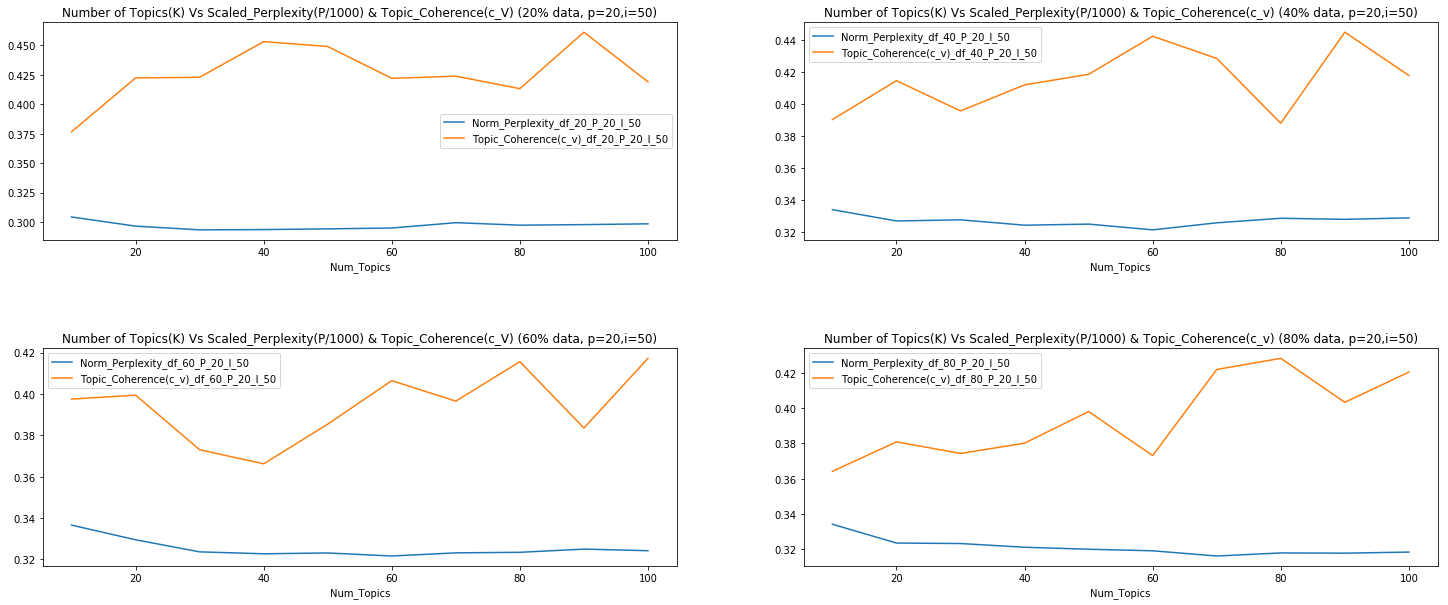

In [58]:
figsize = (25,10)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=.5)

ax1 = df.plot(ax=axes[0][0], x='Num_Topics', y=['Norm_Perplexity_df_20_P_20_I_50', 'Topic_Coherence(c_v)_df_20_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Scaled_Perplexity(P/1000) & Topic_Coherence(c_V) (20% data, p=20,i=50)')

ax2 = df.plot(ax=axes[0][1], x='Num_Topics', y=['Norm_Perplexity_df_40_P_20_I_50', 'Topic_Coherence(c_v)_df_40_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Scaled_Perplexity(P/1000) & Topic_Coherence(c_v) (40% data, p=20,i=50)')

ax3 = df.plot(ax=axes[1][0], x='Num_Topics', y=['Norm_Perplexity_df_60_P_20_I_50', 'Topic_Coherence(c_v)_df_60_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Scaled_Perplexity(P/1000) & Topic_Coherence(c_V) (60% data, p=20,i=50)')

ax4 = df.plot(ax=axes[1][1], x='Num_Topics', y=['Norm_Perplexity_df_80_P_20_I_50', 'Topic_Coherence(c_v)_df_80_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Scaled_Perplexity(P/1000) & Topic_Coherence(c_v) (80% data, p=20,i=50)')


plt.savefig(OUTPUT_DIR+"/Topic_Coherence_graphs_20_i50_5.png")

In [61]:
measures['P/TC(C_V)df_20'] = measures['Perplexity_df_20_P_20_I_50']/measures['Topic_Coherence(c_v)_df_20_P_20_I_50']
measures['P/TC(C_V)df_40'] = measures['Perplexity_df_40_P_20_I_50']/measures['Topic_Coherence(c_v)_df_40_P_20_I_50']
measures['P/TC(C_V)df_60'] = measures['Perplexity_df_60_P_20_I_50']/measures['Topic_Coherence(c_v)_df_60_P_20_I_50']
measures['P/TC(C_V)df_80'] = measures['Perplexity_df_80_P_20_I_50']/measures['Topic_Coherence(c_v)_df_80_P_20_I_50']

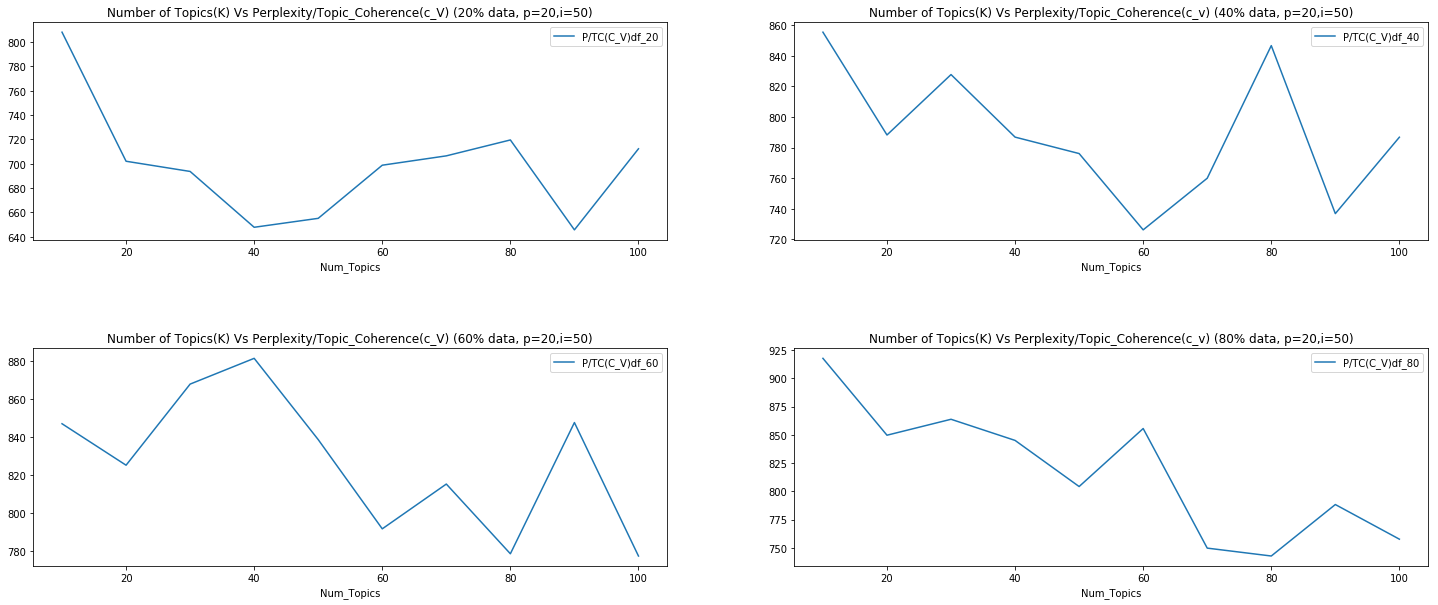

In [62]:
df = measures
figsize = (25,10)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=.5)

ax1 = df.plot(ax=axes[0][0], x='Num_Topics', y=['P/TC(C_V)df_20'],
                                         figsize=figsize, title='Number of Topics(K) Vs Perplexity/Topic_Coherence(c_V) (20% data, p=20,i=50)')

ax2 = df.plot(ax=axes[0][1], x='Num_Topics', y=['P/TC(C_V)df_40'],
                                         figsize=figsize, title='Number of Topics(K) Vs Perplexity/Topic_Coherence(c_v) (40% data, p=20,i=50)')

ax3 = df.plot(ax=axes[1][0], x='Num_Topics', y=['P/TC(C_V)df_60'],
                                         figsize=figsize, title='Number of Topics(K) Vs Perplexity/Topic_Coherence(c_V) (60% data, p=20,i=50)')

ax4 = df.plot(ax=axes[1][1], x='Num_Topics', y=['P/TC(C_V)df_80'],
                                         figsize=figsize, title='Number of Topics(K) Vs Perplexity/Topic_Coherence(c_v) (80% data, p=20,i=50)')


plt.savefig(OUTPUT_DIR+"/Test.png")

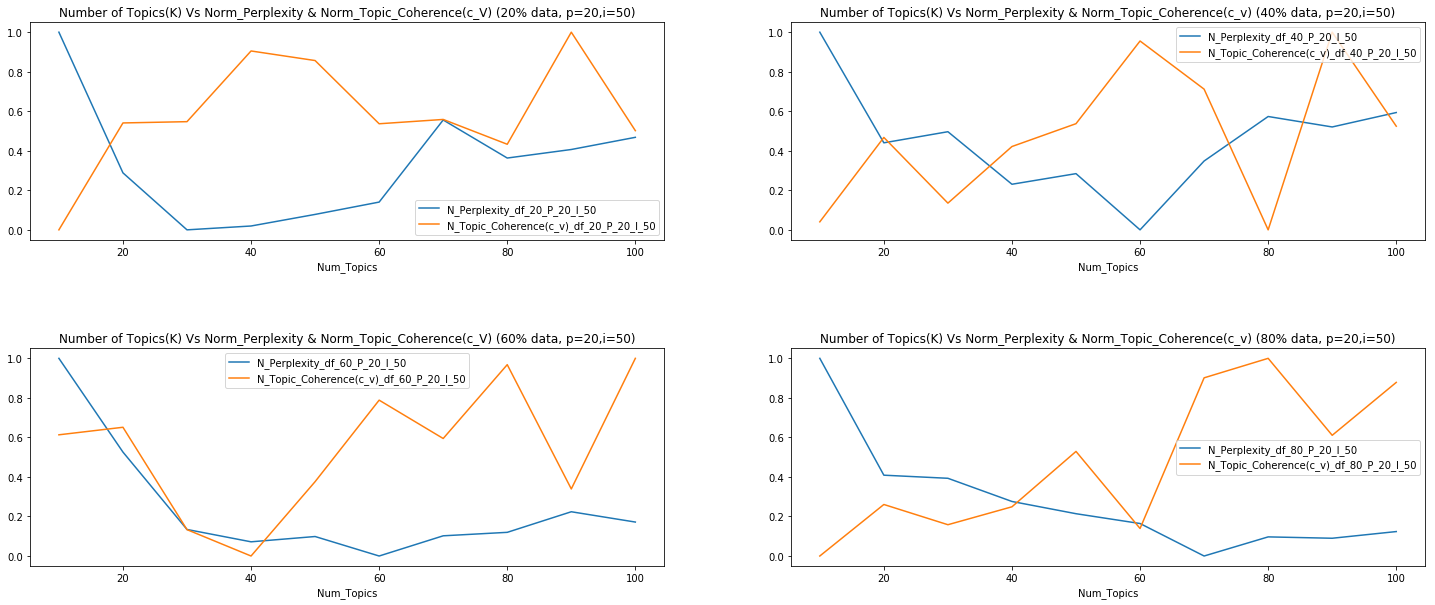

In [117]:
df = measures
figsize = (25,10)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=.5)

ax1 = df.plot(ax=axes[0][0], x='Num_Topics', y=['N_Perplexity_df_20_P_20_I_50', 'N_Topic_Coherence(c_v)_df_20_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Norm_Perplexity & Norm_Topic_Coherence(c_V) (20% data, p=20,i=50)')

ax2 = df.plot(ax=axes[0][1], x='Num_Topics', y=['N_Perplexity_df_40_P_20_I_50', 'N_Topic_Coherence(c_v)_df_40_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Norm_Perplexity & Norm_Topic_Coherence(c_v) (40% data, p=20,i=50)')

ax3 = df.plot(ax=axes[1][0], x='Num_Topics', y=['N_Perplexity_df_60_P_20_I_50', 'N_Topic_Coherence(c_v)_df_60_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Norm_Perplexity & Norm_Topic_Coherence(c_V) (60% data, p=20,i=50)')

ax4 = df.plot(ax=axes[1][1], x='Num_Topics', y=['N_Perplexity_df_80_P_20_I_50', 'N_Topic_Coherence(c_v)_df_80_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Norm_Perplexity & Norm_Topic_Coherence(c_v) (80% data, p=20,i=50)')


plt.savefig(OUTPUT_DIR+"/Topic_Coherence_graphs_20_i50_test.png")

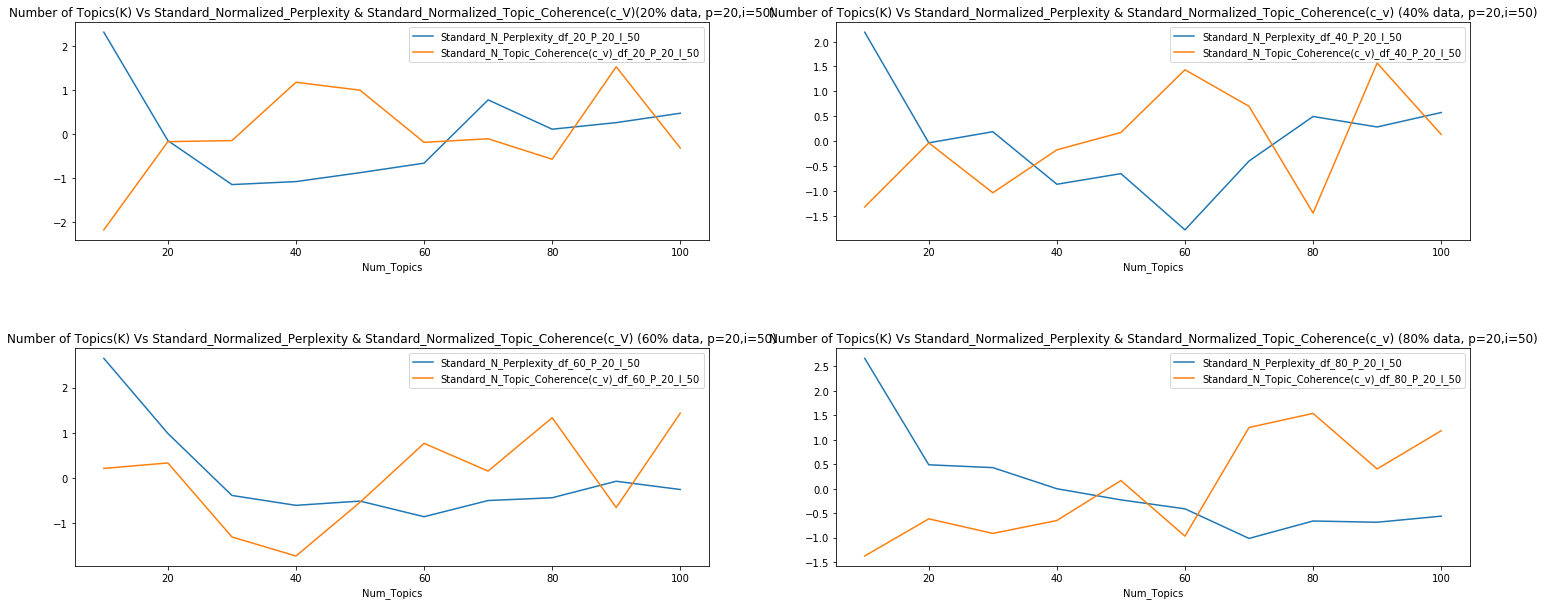

In [25]:
df = measures
figsize = (25,10)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=.5)

ax1 = df.plot(ax=axes[0][0], x='Num_Topics', y=['Standard_N_Perplexity_df_20_P_20_I_50', 'Standard_N_Topic_Coherence(c_v)_df_20_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Standard_Normalized_Perplexity & Standard_Normalized_Topic_Coherence(c_V)(20% data, p=20,i=50)')

ax2 = df.plot(ax=axes[0][1], x='Num_Topics', y=['Standard_N_Perplexity_df_40_P_20_I_50', 'Standard_N_Topic_Coherence(c_v)_df_40_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Standard_Normalized_Perplexity & Standard_Normalized_Topic_Coherence(c_v) (40% data, p=20,i=50)')

ax3 = df.plot(ax=axes[1][0], x='Num_Topics', y=['Standard_N_Perplexity_df_60_P_20_I_50', 'Standard_N_Topic_Coherence(c_v)_df_60_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Standard_Normalized_Perplexity & Standard_Normalized_Topic_Coherence(c_V) (60% data, p=20,i=50)')

ax4 = df.plot(ax=axes[1][1], x='Num_Topics', y=['Standard_N_Perplexity_df_80_P_20_I_50', 'Standard_N_Topic_Coherence(c_v)_df_80_P_20_I_50'],
                                         figsize=figsize, title='Number of Topics(K) Vs Standard_Normalized_Perplexity & Standard_Normalized_Topic_Coherence(c_v) (80% data, p=20,i=50)')


plt.savefig(OUTPUT_DIR+"/Standard_Norm_P&TC_graphs_p20_i50.png")